In [1]:
# import
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import scipy.spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

C:\Users\jeffo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [4]:
#set the root
root = '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data'

In [9]:
#now generate the ground truth
krt_train = os.path.join(root,'keratin\\train_data','images')
krt_test = os.path.join(root,'keratin\\test_data','images')
nuc_train = os.path.join(root,'nuclei\\train_data','images')
nuc_test = os.path.join(root,'nuclei\\test_data','images')
path_sets = [krt_train,krt_test] 

In [10]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [11]:
print(img_paths)

['\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_1.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_10.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_11.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_12.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_13.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_14.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_15.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_16.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_17.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_18.jpg', '\\Users\\jeffo\\Coding\\ihc_cellcount\\Data\\keratin\\train_data\\images\\IMG_19.jpg', '\\Users\\jeffo\\Coding\\ihc_cel

In [12]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_10.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_11.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_12.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_13.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_14.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_15.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_16.jpg
(768, 1024)
generate density...
done.
\Users\jeffo\Coding\ihc_cellcount\Data\keratin\train_data\images\IMG_17.jpg
(768, 1024)
g

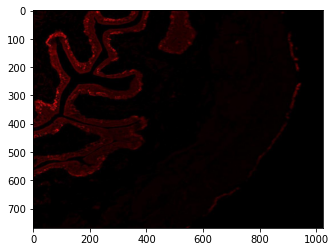

In [13]:
#now see a sample
plt.imshow(Image.open(img_paths[0]))

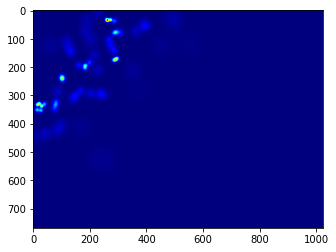

In [14]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [15]:
np.sum(groundtruth)

61.254814

In [ ]:
#now generate the ShanghaiB's ground truth
#path_sets = [nuc_train,nuc_test]

In [ ]:
#img_paths = []
#for path in path_sets:
    #for img_path in glob.glob(os.path.join(path, '*.jpg')):
        #img_paths.append(img_path)

In [ ]:
#for img_path in img_paths:
    #print (img_path)
    #mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    #img= plt.imread(img_path)
    #k = np.zeros((img.shape[0],img.shape[1]))
    #gt = mat["image_info"][0,0][0,0][0]
    #for i in range(0,len(gt)):
        #if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            #k[int(gt[i][1]),int(gt[i][0])]=1
    #k = gaussian_filter(k,15)
    #with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            #hf['density'] = k